<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# This block is just for importing the necessary libraries.  
import os
from collections import defaultdict
# Numerical libraries
import pandas as pd
import numpy as np
import biom
import arviz as az
from scipy.spatial.distance import euclidean
# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib_venn import venn2, venn3
# custom utility and plotting functions
from util import (extract_differentials, select_features, 
                  get_genomic_data, collapse_transcripts, 
                  aggregate_pathways,
                  ranking, btest, log_pvalue, read_kegg_dict,
                  ilr_transform_differentials,
                  rename_clades, create_projection,
                  match_all_differentials)
from plot import (rankplot, networkplot, vectorplot)
import random

# directory paths
dan_directory = '../sfari/data/sra_shotgun/Dan2020'
averina_directory = '../sfari/data/sra_shotgun/Averina2020'
wang_directory = '../sfari/data/sra_shotgun/Wang2021'

results_dir = '../results'
kegg_dir = f'{results_dir}/kegg'
hsa_dir = f'{results_dir}/hsa_kegg'
np.random.seed(0)
random.seed(0)
%matplotlib inline

In [2]:
# load 16S, whole genome shotgun and RNAseq data
posterior_name = os.path.join('age_sex_matched_posterior/viral_differentials.nc')
dan_fname = f'{dan_directory}/{posterior_name}'
averina_fname = f'{averina_directory}/{posterior_name}'
wang_fname = f'{wang_directory}/{posterior_name}'
dan_diffs = extract_differentials(dan_fname)
averina_diffs = extract_differentials(averina_fname)
wang_diffs = extract_differentials(wang_fname)

# Compute statistical tests for each data layer
# Here, we will only focus on the top 5% of the features
dan_stats = ranking(dan_diffs, reference_percentile=95)
averina_stats = ranking(averina_diffs, reference_percentile=95)
wang_stats = ranking(wang_diffs, reference_percentile=95)

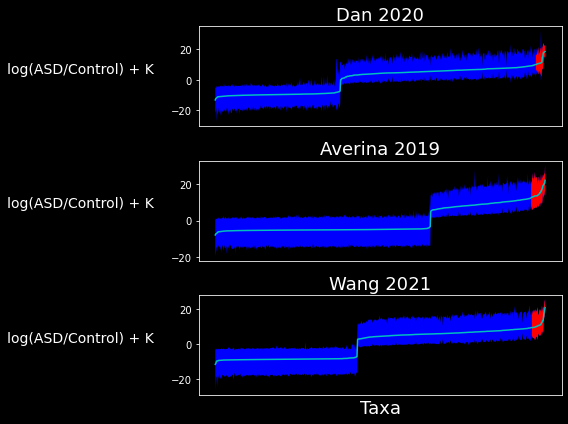

In [3]:
# Plot the log-fold changes
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(3, 1, figsize=(8, 6))
    rankplot(dan_stats, ax[0])
    ax[0].set_title('Dan 2020', 
                    fontsize=18)
    ax[0].set_xticks([])
    rankplot(averina_stats, ax[1])
    ax[1].set_title('Averina 2019', 
                    fontsize=18)
    ax[1].set_xticks([])
    rankplot(wang_stats, ax[2])
    ax[2].set_title('Wang 2021', 
                    fontsize=18)
    ax[2].set_xticks([])
    ax[2].set_xlabel('Taxa', fontsize=18)
    plt.tight_layout()

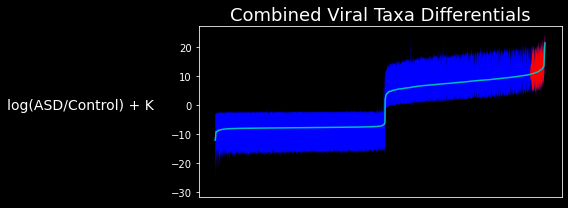

In [4]:
combined_directory = '../sfari/data/sra_shotgun/Combined'
# load 16S, whole genome shotgun and RNAseq data
posterior_name = os.path.join('age_sex_matched_posterior/viral_differentials.nc')
combined_fname = f'{combined_directory}/{posterior_name}'
combined_diffs = extract_differentials(combined_fname)
combined_stats = ranking(combined_diffs, reference_percentile=95)

# Plot the log-fold changes
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(8, 3))
    rankplot(combined_stats, ax)
    ax.set_title('Combined Viral Taxa Differentials', 
                 fontsize=18)
    ax.set_xticks([])
    plt.tight_layout()

/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

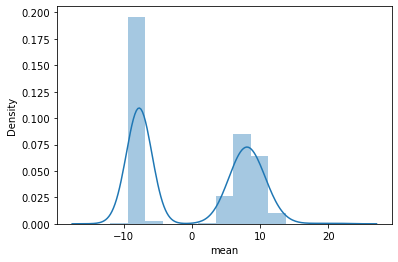

In [8]:
sns.distplot(combined_stats['mean'])